# Real Estate Valuation Analysis

### Background and Problem Definition ###

Effective real estate valuation is critical for investment decisions. This project aims to leverage machine learning techniques to improve the precision of property valuation predictions. This projects uses a comprehensive dataset from the UCI Machine Learning Repository, which includes transaction dates, house age, proximity to amenities such as MRT stations and convenience stores, and geographic coordinates.

Dataset Source: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set
Author: I-Cheng Yeh

I learned many of the functions used in this project from the sites below:
https://www.geeksforgeeks.org/
https://pandas.pydata.org/docs/reference/

In [7]:
### The following code chunk was provided by UCI repository to import dataset ###
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
x = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets 
###

Note: you may need to restart the kernel to use updated packages.


In [8]:
### Setup and load data ###
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.concat([x,y], axis=1)
data.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
### Data wrangling, munging, and cleaning ###

print(data.isnull().sum())
##Checks for empty observations##

print(data.info())
##Displays column datatype and other useful information##

data.columns = ['transaction date', 'house age', 'distance to the nearest MRT station',
        'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']
##Easier to type column names

##Example of Data Munging
def convert_transaction_date(date):
    year = int(date)
    fraction = date - year
    month = round(fraction * 12) 
    if month < 1:
        month = 1
    return pd.to_datetime(f'{year}-{month}-01')
example = data['transaction date'].apply(convert_transaction_date)
munged_df = pd.DataFrame(example)
print(munged_df)



X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of u

       transaction date   house age  distance to the nearest MRT station  \
count        414.000000  414.000000                           414.000000   
mean        2013.148971   17.712560                          1083.885689   
std            0.281967   11.392485                          1262.109595   
min         2012.667000    0.000000                            23.382840   
25%         2012.917000    9.025000                           289.324800   
50%         2013.167000   16.100000                           492.231300   
75%         2013.417000   28.150000                          1454.279000   
max         2013.583000   43.800000                          6488.021000   

       number of convenience stores    latitude   longitude  \
count                    414.000000  414.000000  414.000000   
mean                       4.094203   24.969030  121.533361   
std                        2.945562    0.012410    0.015347   
min                        0.000000   24.932070  121.473530   


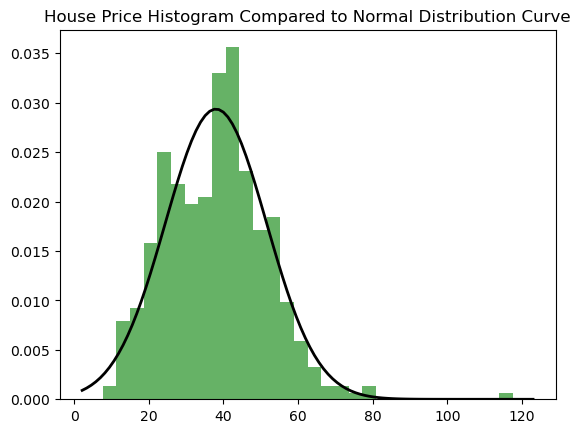

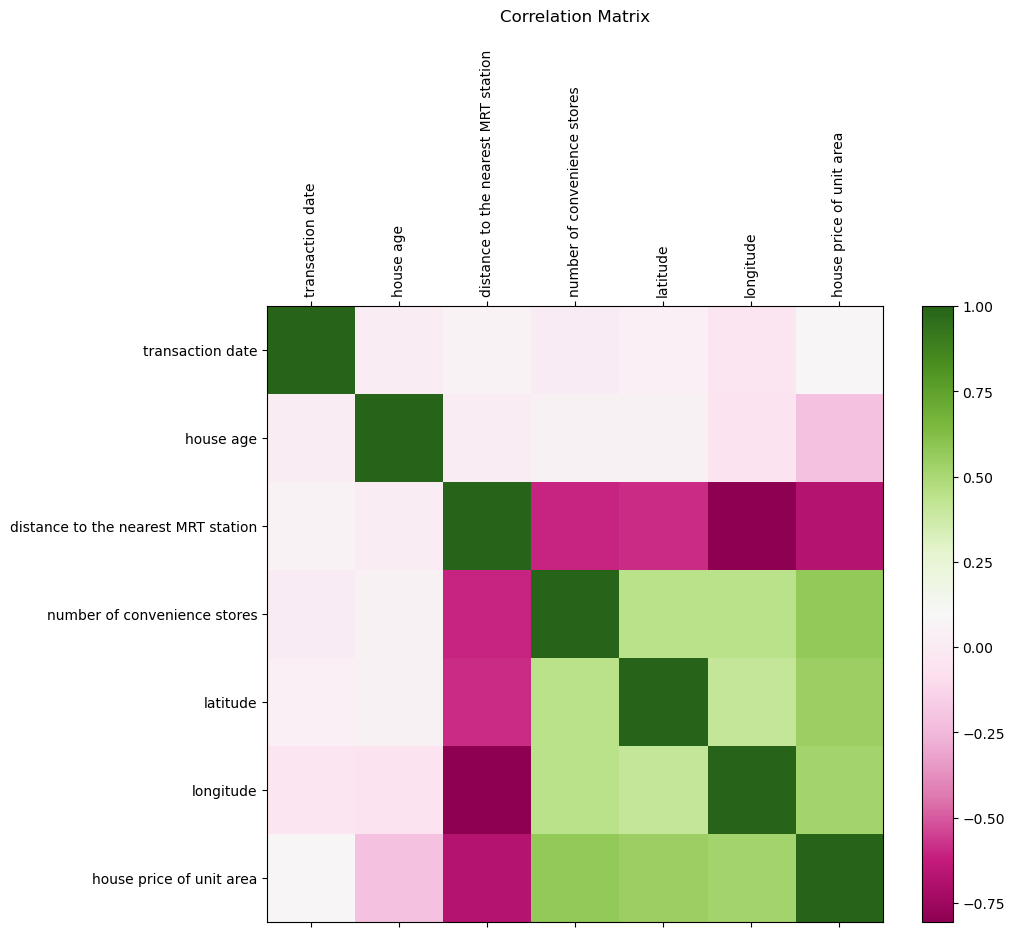

In [10]:
### Exploratory Data Analysis ###
print(data.describe())
##Gives measures of central tendency##

mu, std = norm.fit(data['house price of unit area'])
plt.hist(data['house price of unit area'], bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x,p,'k', linewidth=2)
title = "House Price Histogram Compared to Normal Distribution Curve"
plt.title(title)
plt.show()
##Check for Normality -- Discussion below##

correlation_matrix = data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='PiYG')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
fig.colorbar(cax)
plt.title('Correlation Matrix', pad=20)
plt.show()
##Visual representaion of variable correlation -- Discussion below##

### Initial Discussion

To assess the normality of the distribution of house prices in the dataset, I utilize a histogram plot using matplotlib. Histograms provide a visual representation of data distribution by binning values into intervals and counting the frequency of observations within each bin. In my analysis, the histogram of house prices shows a roughly bell-shaped curve, resembling a normal distribution pattern. This observation is crucial as it suggests that house prices in the dataset are distributed in a manner that approximates a normal distribution, which is a fundamental assumption for many statistical analyses. 

To explore relationships between variables in the real estate valuation dataset, I employ a correlation heatmap using pandas and matplotlib. The heatmap visualizes pairwise correlations between numerical features such as house price, transaction date, house age, distance to the nearest MRT station, and number of convenience stores. Strong correlations are indicated by darker shades of green and pink (green = positive correlation, pink = negative correlation), while weaker correlations are lighter shades. For instance, I observed a fairly moderate negative correlation between the distance to the nearest MRT station and house price, suggesting that houses closer to MRT stations tend to have higher prices.

To further investigate this relationship, I applied linear regression using the scikit-learn library in Python. This approach quantifies the impact of predictors on house prices and assesses the model's goodness-of-fit through metrics like R-squared and p-values.


Coefficients: [ 4.38955669e+00 -2.70053850e-01 -4.12709594e-03  1.30078937e+00
  2.01781427e+02  9.42845790e+00]
Intercept: -14979.518631518511
Mean Squared Error: 107.33
R-squared: 0.50


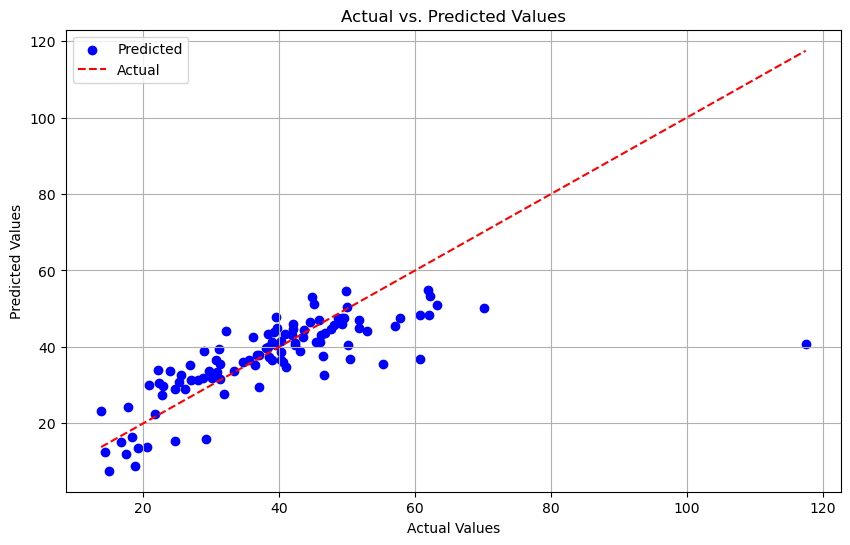

In [11]:
X = data[['transaction date', 'house age', 'distance to the nearest MRT station',
        'number of convenience stores', 'latitude', 'longitude']]
Y = data['house price of unit area']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
##Split data into training and testing sets

model = LinearRegression()
##Initialize the linear regression model

model.fit(X_train, Y_train)
##Fit the model on the training data

Y_pred = model.predict(X_test)
## Make predictions on the testing data

print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'Mean Squared Error: {mean_squared_error(Y_test, Y_pred):.2f}')
print(f'R-squared: {r2_score(Y_test, Y_pred):.2f}')
# Evaluate the model

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], linestyle='--', color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
##Visually represents the accuracy of the model

### Final Discussion

I used a linear regression model to analyze how several predictors relate to house prices in the dataset. The model included predictors such as transaction date, house age, distance to the nearest MRT station, number of convenience stores nearby, latitude, and longitude, aiming to predict house prices accurately. Upon evaluating the model's performance, I observed that the scatter plot of predicted versus actual house prices closely follows a linear trend, indicating a strong alignment between the model's predictions and the actual data points. The R-squared value of the linear regression model is 0.55, indicating that these predictors explain 55% of the variability in house prices. This suggests a moderate level of predictive power, where the variables collectively account for a significant portion of the variance observed in house prices.

For further development, exploring additional variables that may influence house prices could enrich the model's predictive capability. Variables such as neighborhood demographics, property size, and economic indicators could provide valuable insights into price variations beyond the current predictors. Additionally, the model may benefit from choosing limited predictors that have the most effect on house prices. By comparing the affect factors such as distance to nearby convenience stores or MRT stations, the model can be refined to make more accurate predictions. 